In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

path = "./datasets/_data.csv"
rent = pd.read_csv(path)

In [3]:
rent

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


In [4]:
# 'Адрес' – analys
# Define 'City' column 
cities = rent['Адрес'].apply(lambda x: x.split(',')[0])
cities.unique()

array(['Москва', 'Санкт-Петербург', 'Краснодарский край'], dtype=object)

In [5]:
# 'Адрес' – remove rows with 'Москва', 'Санкт-Петербург'
rent.drop(rent[rent['Адрес'].str.startswith('Санкт-Петербург')].index, inplace = True)
rent.drop(rent[rent['Адрес'].str.startswith('Краснодарский край')].index, inplace = True)
cities = rent['Адрес'].apply(lambda x: x.split(',')[0])
cities.unique()

array(['Москва'], dtype=object)

In [6]:
rent

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


In [7]:
rent = rent.drop(labels ='Unnamed: 0', axis= 1)
rent

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


In [8]:
rent['Станция Метро'] = rent['Метро'].str.split('(').str[0]
rent['Станция Метро']

0        м. Смоленская 
1        м. Смоленская 
2        м. Смоленская 
3        м. Смоленская 
4         м. Арбатская 
              ...      
23363      м. Говорово 
23364      м. Солнцево 
23365      м. Солнцево 
23366      м. Солнцево 
23367      м. Говорово 
Name: Станция Метро, Length: 19737, dtype: object

In [9]:
rent['Расстояние от метро'] = rent['Метро'].str.split('(').str[1]
rent['Расстояние от метро'] = rent['Расстояние от метро'].str[:-1]
rent['Расстояние от метро']

0         9 мин пешком
1         8 мин пешком
2         7 мин пешком
3         3 мин пешком
4         7 мин пешком
             ...      
23363     8 мин пешком
23364     7 мин пешком
23365     6 мин пешком
23366    11 мин пешком
23367    10 мин пешком
Name: Расстояние от метро, Length: 19737, dtype: object

In [10]:
rent['Станция Метро']=rent['Станция Метро'].str[3:-1]

In [11]:
rent.groupby('Станция Метро', as_index=False).agg({'ID  объявления': 'count'})

,Станция Метро,ID объявления
0,Авиамоторная,107
1,Автозаводская,57
2,Академическая,191
3,Александровский сад,3
4,Алексеевская,171
...,...,...
272,Юго-Западная,138
273,Южная,73
274,Ясенево,127
275,Яхромская,1


In [22]:
metro = pd.read_json('datasets/metro.msk.json')
metro

,hex_color,stations,name
0,FFCD1C,"[{'lat': 55.7451134, 'lng': 37.86405, 'order':...",Калининская
1,4FB04F,"[{'lat': 55.8777, 'lng': 37.4877, 'order': 0, ...",Замоскворецкая
2,F07E24,"[{'lat': 55.8881035, 'lng': 37.6615639, 'order...",Калужско-Рижская
3,E42313,"[{'lat': 55.8149147, 'lng': 37.7322273, 'order...",Сокольническая
4,0072BA,"[{'lat': 55.8099632, 'lng': 37.79826, 'order':...",Арбатско-Покровская
5,1EBCEF,"[{'lat': 55.7308159, 'lng': 37.4467545, 'order...",Филевская
6,ADACAC,"[{'lat': 55.8990326, 'lng': 37.58647, 'order':...",Серпуховско-Тимирязевская
7,943E90,"[{'lat': 55.8596764, 'lng': 37.43681, 'order':...",Таганско-Краснопресненская
8,915133,"[{'lat': 55.7796059, 'lng': 37.6012535, 'order...",Кольцевая
9,BED12C,"[{'lat': 55.85566, 'lng': 37.56282, 'order': 0...",Люблинско-Дмитровская


In [23]:
metro2 = metro['stations'].apply(pd.Series)
metro2

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,"{'lat': 55.7451134, 'lng': 37.86405, 'order': ...","{'lat': 55.7522354, 'lng': 37.8145866, 'order'...","{'lat': 55.75098, 'lng': 37.78422, 'order': 2,...","{'lat': 55.75809, 'lng': 37.7517, 'order': 3, ...","{'lat': 55.7519341, 'lng': 37.7174454, 'order'...","{'lat': 55.7471161, 'lng': 37.6807251, 'order'...","{'lat': 55.7407455, 'lng': 37.65604, 'order': ...","{'lat': 55.7411232, 'lng': 37.62614, 'order': ...","{'lat': 55.79233, 'lng': 37.55952, 'order': 8,...","{'lat': 55.78643, 'lng': 37.53502, 'order': 9,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'lat': 55.8777, 'lng': 37.4877, 'order': 0, '...","{'lat': 55.8541527, 'lng': 37.4767265, 'order'...","{'lat': 55.8389778, 'lng': 37.4875145, 'order'...","{'lat': 55.818924, 'lng': 37.49779, 'order': 3...","{'lat': 55.8055649, 'lng': 37.5152435, 'order'...","{'lat': 55.80044, 'lng': 37.5304756, 'order': ...","{'lat': 55.7897034, 'lng': 37.5582123, 'order'...","{'lat': 55.77744, 'lng': 37.5821075, 'order': ...","{'lat': 55.76981, 'lng': 37.59619, 'order': 8,...","{'lat': 55.7653427, 'lng': 37.6039162, 'order'...",...,"{'lat': 55.6140747, 'lng': 37.7427, 'order': 2...","{'lat': 55.63349, 'lng': 37.76568, 'order': 22...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'lat': 55.8881035, 'lng': 37.6615639, 'order'...","{'lat': 55.87064, 'lng': 37.66434, 'order': 1,...","{'lat': 55.8555565, 'lng': 37.6533775, 'order'...","{'lat': 55.8445969, 'lng': 37.63781, 'order': ...","{'lat': 55.8196259, 'lng': 37.64075, 'order': ...","{'lat': 55.8077927, 'lng': 37.6387, 'order': 5...","{'lat': 55.7924957, 'lng': 37.6361122, 'order'...","{'lat': 55.781826, 'lng': 37.6331978, 'order':...","{'lat': 55.772316000000004, 'lng': 37.63285, '...","{'lat': 55.76537, 'lng': 37.63673, 'order': 9,...",...,"{'lat': 55.61873, 'lng': 37.5059128, 'order': ...","{'lat': 55.6061821, 'lng': 37.5334, 'order': 2...","{'lat': 55.6019478, 'lng': 37.5530167, 'order'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'lat': 55.8149147, 'lng': 37.7322273, 'order'...","{'lat': 55.8027878, 'lng': 37.74486, 'order': ...","{'lat': 55.79632, 'lng': 37.71358, 'order': 2,...","{'lat': 55.7892838, 'lng': 37.6798935, 'order'...","{'lat': 55.780014, 'lng': 37.6660957, 'order':...","{'lat': 55.77407, 'lng': 37.6545639, 'order': ...","{'lat': 55.7683067, 'lng': 37.6478, 'order': 6...","{'lat': 55.76499, 'lng': 37.6382942, 'order': ...","{'lat': 55.7598877, 'lng': 37.6253357, 'order'...","{'lat': 55.75723, 'lng': 37.615078, 'order': 9...",...,"{'lat': 55.6227, 'lng': 37.424, 'order': 21, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'lat': 55.8099632, 'lng': 37.79826, 'order': ...","{'lat': 55.7943764, 'lng': 37.7993622, 'order'...","{'lat': 55.7877121, 'lng': 37.7798958, 'order'...","{'lat': 55.7884026, 'lng': 37.74882, 'order': ...","{'lat': 55.7830963, 'lng': 37.7192879, 'order'...","{'lat': 55.78206, 'lng': 37.7053, 'order': 5, ...","{'lat': 55.7724037, 'lng': 37.67904, 'order': ...","{'lat': 55.75674, 'lng': 37.62236, 'order': 7,...","{'lat': 55.758564, 'lng': 37.65904, 'order': 8...","{'lat': 55.75231, 'lng': 37.60349, 'order': 9,...",...,"{'lat': 55.8536339, 'lng': 37.3531075, 'order'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{'lat': 55.7308159, 'lng': 37.4467545, 'order'...","{'lat': 55.7360268, 'lng': 37.46673, 'order': ...","{'lat': 55.739666, 'lng': 37.483902, 'order': ...","{'lat': 55.7435455, 'lng': 37.4970436, 'order'...","{'lat': 55.74676, 'lng': 37.5140343, 'order': ...","{'lat': 55.7405434, 'lng': 37.5341, 'order': 5...","{'lat': 55.73876, 'lng': 37.54842, 'order': 6,...","{'lat': 55.7431679, 'lng': 37.5654259, 'order'...","{'lat': 55.7490845, 'lng': 37.5821724, 'order'...","{'lat': 55.75212, 'lng': 37.6015549, 'order': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"{'lat': 55.8990326, 'lng': 37.58647, 'order': ...","{'lat': 55.88387, 'lng': 37.6030121, 'order': ...","{'lat': 55.8642731, 'lng': 37.6050644, 'order'...","{'lat': 55.8482361, 'lng': 37.59045, 'order': ...","{'

In [24]:
metro_metro = pd.DataFrame()
x = 0
while x < len(metro2.index):
    pd.concat([metro_metro, metro2.loc[x].apply(pd.Series)], ignore_index=True)
    x += 1
metro_metro    

""


In [39]:
metro_metro = pd.concat([metro_metro, metro2.loc[14].apply(pd.Series)], ignore_index=True)
metro_metro

,lat,lng,order,name,admArea,district,status,0
0,55.745113,37.864050,0.0,Новокосино,Восточный административный округ,Новокосино,действует,NaN
1,55.752235,37.814587,1.0,Новогиреево,Восточный административный округ,Новогиреево,действует,NaN
2,55.750980,37.784220,2.0,Перово,Восточный административный округ,Новогиреево,действует,NaN
3,55.758090,37.751700,3.0,Шоссе Энтузиастов,Восточный административный округ,Перово,действует,NaN
4,55.751934,37.717445,4.0,Авиамоторная,Юго-Восточный административный округ,Лефортово,строится,NaN
...,...,...,...,...,...,...,...,...
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
metro_metro= metro_metro.dropna(how='all')
metro_metro

,lat,lng,order,name,admArea,district,status,0
0,55.745113,37.864050,0.0,Новокосино,Восточный административный округ,Новокосино,действует,NaN
1,55.752235,37.814587,1.0,Новогиреево,Восточный административный округ,Новогиреево,действует,NaN
2,55.750980,37.784220,2.0,Перово,Восточный административный округ,Новогиреево,действует,NaN
3,55.758090,37.751700,3.0,Шоссе Энтузиастов,Восточный административный округ,Перово,действует,NaN
4,55.751934,37.717445,4.0,Авиамоторная,Юго-Восточный административный округ,Лефортово,строится,NaN
...,...,...,...,...,...,...,...,...
434,55.792330,37.559520,0.0,Петровский парк,Северный административный округ,Аэропорт,строится,NaN
435,55.786430,37.535020,1.0,ЦСКА,Северный административный округ,Хорошёвский,строится,NaN
436,55.776430,37.519810,2.0,Хорошевская,Северный административный округ,Хорошёвский,действует,NaN
437,55.757230,37.525710,3.0,Шелепиха,Центральный административный округ,Пресненский,действует,NaN


In [41]:
metro_metro = metro_metro.drop_duplicates(subset=['name'])
metro_metro


,lat,lng,order,name,admArea,district,status,0
0,55.745113,37.864050,0.0,Новокосино,Восточный административный округ,Новокосино,действует,NaN
1,55.752235,37.814587,1.0,Новогиреево,Восточный административный округ,Новогиреево,действует,NaN
2,55.750980,37.784220,2.0,Перово,Восточный административный округ,Новогиреево,действует,NaN
3,55.758090,37.751700,3.0,Шоссе Энтузиастов,Восточный административный округ,Перово,действует,NaN
4,55.751934,37.717445,4.0,Авиамоторная,Юго-Восточный административный округ,Лефортово,строится,NaN
...,...,...,...,...,...,...,...,...
404,55.821877,37.591206,1.0,Улица Милашенкова,Северо-Восточный административный округ,Бутырский,действует,NaN
405,55.821796,37.608975,2.0,Телецентр,Северо-Восточный административный округ,Останкинский,действует,NaN
406,55.821820,37.627167,3.0,Улица Академика Королева,Северо-Восточный административный округ,Останкинский,действует,NaN
407,55.824085,37.638493,4.0,Выставочный центр,Северо-Восточный административный округ,Останкинский,действует,NaN


In [42]:
metro_metro.sort_values(by='name')

,lat,lng,order,name,admArea,district,status,0
4,55.751934,37.717445,4.0,Авиамоторная,Юго-Восточный административный округ,Лефортово,строится,NaN
44,55.706634,37.657010,13.0,Автозаводская,Южный административный округ,Даниловский,действует,NaN
77,55.687145,37.572300,15.0,Академическая,Юго-Западный административный округ,Академический,действует,NaN
165,55.752254,37.608776,10.0,Александровский сад,Центральный административный округ,Тверской,действует,NaN
67,55.807793,37.638700,5.0,Алексеевская,Северо-Восточный административный округ,Алексеевский,действует,NaN
...,...,...,...,...,...,...,...,...
221,55.809400,37.463240,4.0,Щукинская,Северо-Западный административный округ,Щукино,действует,NaN
129,55.782060,37.705300,5.0,Электрозаводская,Восточный административный округ,Соколиная Гора,действует,NaN
111,55.663147,37.482853,18.0,Юго-Западная,Западный административный округ,Тропарёво-Никулино,действует,NaN
206,55.622436,37.609047,20.0,Южная,Южный административный округ,Чертаново Центральное,действует,NaN


In [43]:
rent.groupby('Станция Метро', as_index=False).agg({'ID  объявления': 'count'})

,Станция Метро,ID объявления
0,Авиамоторная,107
1,Автозаводская,57
2,Академическая,191
3,Александровский сад,3
4,Алексеевская,171
...,...,...
272,Юго-Западная,138
273,Южная,73
274,Ясенево,127
275,Яхромская,1


In [44]:
metro_metro = metro_metro.rename(columns={'name': 'Станция Метро'})
metro_metro[['Станция Метро', 'admArea']].sort_values('Станция Метро')

,Станция Метро,admArea
4,Авиамоторная,Юго-Восточный административный округ
44,Автозаводская,Южный административный округ
77,Академическая,Юго-Западный административный округ
165,Александровский сад,Центральный административный округ
67,Алексеевская,Северо-Восточный административный округ
...,...,...
221,Щукинская,Северо-Западный административный округ
129,Электрозаводская,Восточный административный округ
111,Юго-Западная,Западный административный округ
206,Южная,Южный административный округ


([<matplotlib.patches.Wedge at 0x7f5420e04d60>,
 [Text(1.0301604729107954, 0.385706365065715, 'Восточный административный округ'),
  Text(0.5276684311402783, 0.9651766816381121, 'Западный административный округ'),
  Text(0.16019663260120395, 1.0882725021350281, 'Новомосковский административный округ'),
  Text(-0.28178013438253585, 1.0632967393288482, 'Северный административный округ'),
  Text(-0.9694212000708851, 0.5198293343522712, 'Северо-Восточный административный округ'),
  Text(-1.0905525312586437, -0.14385818212866877, 'Северо-Западный административный округ'),
  Text(-0.7973790665320308, -0.7577510305215739, 'Центральный административный округ'),
  Text(-0.13969207467244726, -1.0910940034083716, 'Юго-Восточный административный округ'),
  Text(0.4606816189257515, -0.9988856020505796, 'Юго-Западный административный округ'),
  Text(1.0037632019810145, -0.44995492479671917, 'Южный административный округ')])

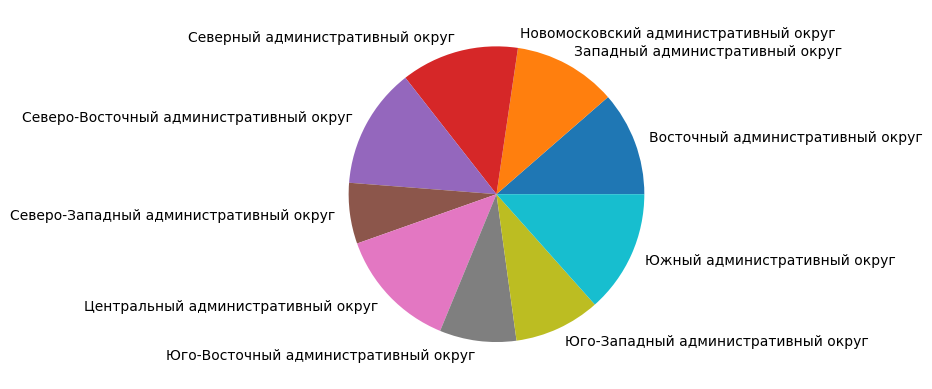

In [46]:
okrugs = pd.merge(rent, metro_metro, left_on='Станция Метро', right_on ='Станция Метро', how='left').groupby('admArea', as_index=False).agg({'ID  объявления': 'count'})
fig, ax = plt.subplots()
ax.pie(okrugs['ID  объявления'], labels=okrugs['admArea'])

In [141]:
rent.head()

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Станция Метро,Расстояние от метро
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,Смоленская,9 мин пешком
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,Смоленская,8 мин пешком
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,Смоленская,7 мин пешком
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,Смоленская,3 мин пешком
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,Арбатская,7 мин пешком


In [47]:
rent['Число комнат'] = rent['Количество комнат'].str.split(',').str[0]
rent

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Станция Метро,Расстояние от метро,Число комнат
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,Смоленская,9 мин пешком,4
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,Смоленская,8 мин пешком,4
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,Смоленская,7 мин пешком,4
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,Смоленская,3 мин пешком,4
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,Арбатская,7 мин пешком,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511,Говорово,8 мин пешком,NaN
23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844,Солнцево,7 мин пешком,1
23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909,Солнцево,6 мин пешком,2
23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525,Солнцево,11 мин пешком,2


In [48]:
rent['Число комнат'] = pd.to_numeric(rent['Число комнат'])

In [49]:
rent['Тип комнат'] = rent['Количество комнат'].str.split(',').str[1]
rent

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Станция Метро,Расстояние от метро,Число комнат,Тип комнат
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,"Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,Смоленская,9 мин пешком,4.0,NaN
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,Смоленская,8 мин пешком,4.0,NaN
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,Смоленская,7 мин пешком,4.0,Оба варианта
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,Смоленская,3 мин пешком,4.0,Оба варианта
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,Арбатская,7 мин пешком,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511,Говорово,8 мин пешком,NaN,NaN
23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844,Солнцево,7 мин пешком,1.0,NaN
23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909,Солнцево,6 мин пешком,2.0,Оба варианта
23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525,Солнцево,11 мин пешком,2.0,NaN


In [50]:
rent = pd.merge(rent, metro_metro[['Станция Метро', 'admArea']], on='Станция Метро', how='left')
rent


,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Станция Метро,Расстояние от метро,Число комнат,Тип комнат,admArea
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,Смоленская,9 мин пешком,4.0,NaN,Центральный административный округ
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,Смоленская,8 мин пешком,4.0,NaN,Центральный административный округ
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,Смоленская,7 мин пешком,4.0,Оба варианта,Центральный административный округ
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,Смоленская,3 мин пешком,4.0,Оба варианта,Центральный административный округ
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,Арбатская,7 мин пешком,2.0,NaN,Центральный административный округ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511,Говорово,8 мин пешком,NaN,NaN,NaN
19733,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844,Солнцево,7 мин пешком,1.0,NaN,NaN
19734,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909,Солнцево,6 мин пешком,2.0,Оба варианта,NaN
19735,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525,Солнцево,11 мин пешком,2.0,NaN,NaN


In [51]:
rent = rent.rename(columns={'admArea': 'Округ'})
rent

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Станция Метро,Расстояние от метро,Число комнат,Тип комнат,Округ
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,Смоленская,9 мин пешком,4.0,NaN,Центральный административный округ
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,Смоленская,8 мин пешком,4.0,NaN,Центральный административный округ
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,Смоленская,7 мин пешком,4.0,Оба варианта,Центральный административный округ
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",...,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,Смоленская,3 мин пешком,4.0,Оба варианта,Центральный административный округ
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,...,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,Арбатская,7 мин пешком,2.0,NaN,Центральный административный округ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,...,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511,Говорово,8 мин пешком,NaN,NaN,NaN
19733,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,...,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844,Солнцево,7 мин пешком,1.0,NaN,NaN
19734,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,...,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909,Солнцево,6 мин пешком,2.0,Оба варианта,NaN
19735,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79660611965,...,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525,Солнцево,11 мин пешком,2.0,NaN,NaN


In [16]:
# 'ID  объявления'


In [17]:
# 'Количество комнат'

In [52]:
# 'Тип'
rent.drop(['Тип'], axis=1, inplace=True)
rent.columns

Index(['ID  объявления', 'Количество комнат', 'Метро', 'Адрес', 'Площадь, м2',
       'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание', 'Ремонт',
       'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление', 'Станция Метро', 'Расстояние от метро',
       'Число комнат', 'Тип комнат', 'Округ'],
      dtype='object')

In [19]:
# 'Метро'


In [20]:
# 'Площадь, м2'


In [51]:
# 'Дом'
def get_floor(row) :
    result = {}
    l = row['Дом'].split(',')
    if len(l) == 0 : return result
    floors = l[0].split('/')
    result['floor_flat'] = floors[0]
    result['floors_total']= floors[1]
    if len(l) > 1 :
        result['building_type'] = l[1][1:] # remove first space
    return result


floor_info = rent.apply(get_floor, axis=1, result_type='expand')
floor_info['floor_flat'] = floor_info['floor_flat'].astype('Int64')
floor_info['floors_total'] = floor_info['floors_total'].astype('Int64')
print(floor_info['building_type'].unique())
print("Number of Nan in building_type: ", floor_info['building_type'].isna().sum())  # 2971 – Nan values
print("\nFlat floor vals:", sorted(floor_info['floor_flat'].unique()))    #range -1 to 85
print("\nTotal floors:", sorted(floor_info['floors_total'].unique()))  #range 1 to 116

['Монолитный' 'Монолитно-кирпичный' nan 'Панельный' 'Сталинский'
 'Кирпичный' 'старый фонд' 'Блочный' 'Деревянный' 'Щитовой']
Number of Nan in building_type:  2971

Flat floor vals: [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 61, 65, 70, 71, 75, 85]

Total floors: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 62, 65, 68, 72, 73, 75, 76, 77, 78, 80, 85, 86, 95, 116]


In [ ]:
# 'Парковка'


In [ ]:
# 'Цена'


In [7]:
# 'Телефоны'
rent.drop(['Телефоны'], axis=1, inplace=True)
rent.columns

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Метро', 'Адрес',
       'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Описание', 'Ремонт',
       'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод'],
      dtype='object')

In [ ]:
# 'Описание'


In [ ]:
# 'Ремонт'


In [ ]:
# 'Площадь комнат, м2'


In [ ]:
# 'Балкон'


In [ ]:
# 'Окна'


In [ ]:
# 'Санузел'


In [ ]:
# 'Можно с детьми/животными'


In [60]:
# 'Дополнительно'

def get_equp(row) :
    result = {}
    if type(row['Дополнительно']) != str : return result
    l = row['Дополнительно'].split(',')
    if len(l) == 0 : return result
    for eq in l :
        if eq[0] == ' ' : eq = eq[1:]
        result[eq] = 1
    return result


additional = rent.apply(get_equp, axis=1, result_type='expand')
for c in additional.columns :
    additional[c] = additional[c].astype('Int64')
additional = additional.fillna(0)
print(additional.columns)
additional

Index(['Мебель в комнатах', 'Мебель на кухне', 'Ванна', 'Душевая кабина',
       'Стиральная машина', 'Кондиционер', 'Посудомоечная машина', 'Телевизор',
       'Холодильник', 'Интернет', 'Телефон'],
      dtype='object')


,Мебель в комнатах,Мебель на кухне,Ванна,Душевая кабина,Стиральная машина,Кондиционер,Посудомоечная машина,Телевизор,Холодильник,Интернет,Телефон
0,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
23363,1,1,1,0,1,1,0,0,1,1,0
23364,1,1,1,0,1,0,0,1,1,0,0
23365,0,1,0,1,1,1,0,0,1,1,0
23366,1,1,1,0,1,1,1,0,1,0,0


In [ ]:
# 'Название ЖК'


In [ ]:
# 'Серия дома'


In [ ]:
# 'Высота потолков, м'


In [ ]:
# 'Лифт'


In [ ]:
# 'Мусоропровод'


In [6]:
# 'Ссылка на объявление'
rent.drop(['Ссылка на объявление'], axis=1, inplace=True)
rent.columns

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Метро', 'Адрес',
       'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание',
       'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод'],
      dtype='object')